<a href="https://colab.research.google.com/github/iyoob-utexas/ds4e/blob/main/notebooks/n1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

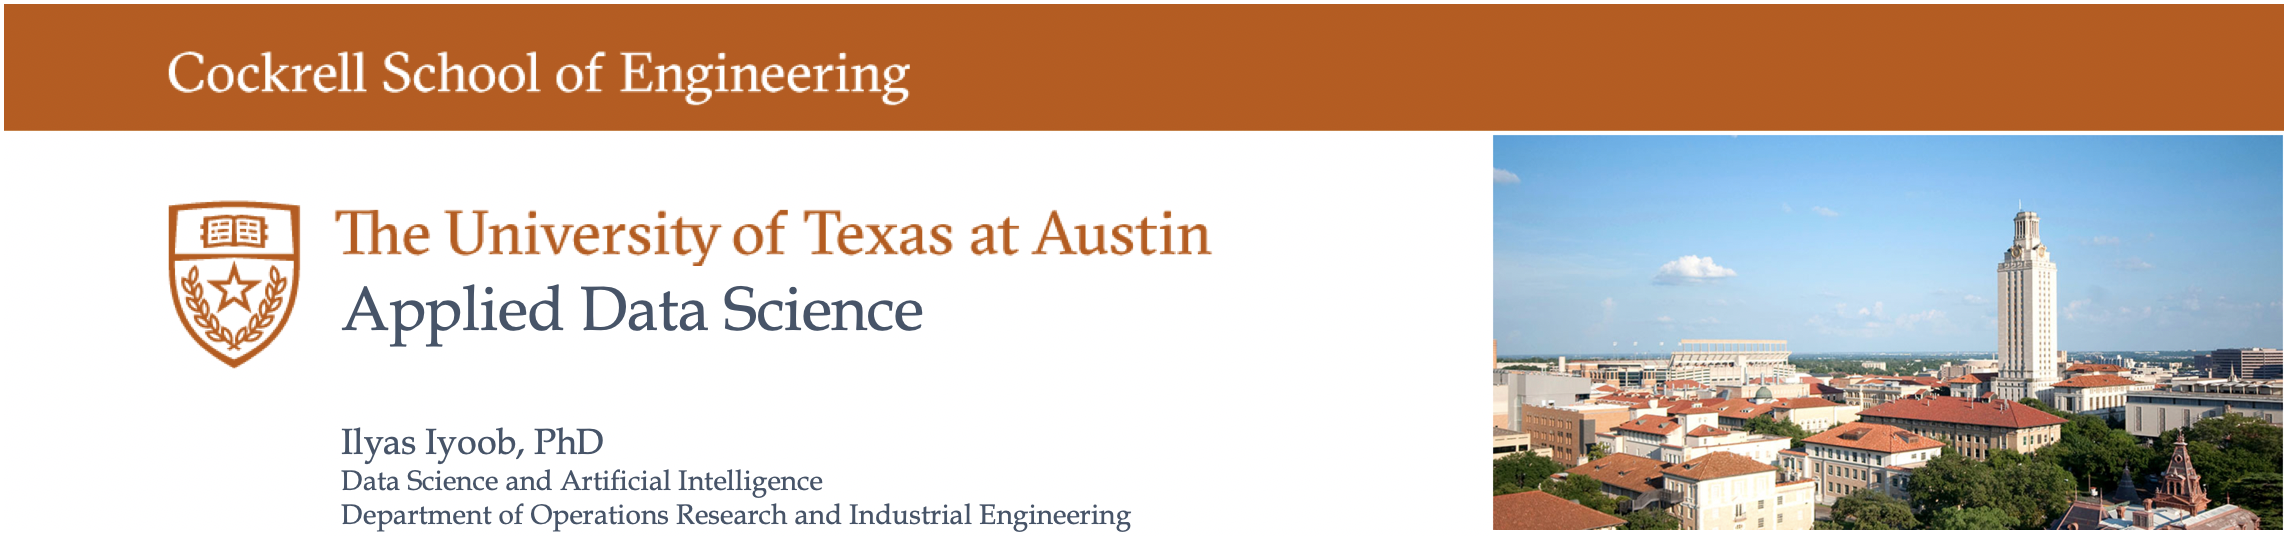

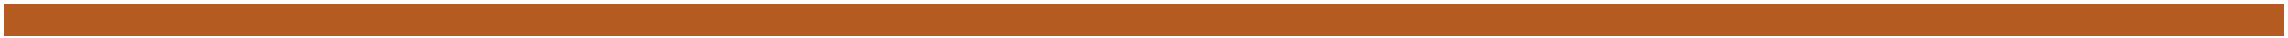

## <font color='#475468'> Restaurant Tips:</font> 
### <font color='#475468'> Can you predict tip amount based on guest information?</font> 

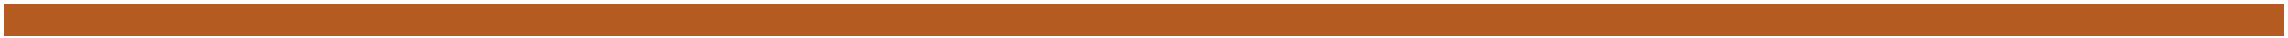

## Initialize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfTips = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/tips/tips.csv')

In [ ]:
dfTips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
dfTips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## Fit a Regression Model to Predict Tip

In [ ]:
# Assign independent(Y) and dependent(X) variables
X = dfTips.loc[:,['total_bill','size']]
Y = dfTips.loc[:,['tip']]

In [ ]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [ ]:
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [0.66894474]
Coefficients: 
 [[0.09271334 0.19259779]]


In [ ]:
# Generate new prediction - aka run scoring model
New_Total_Bill = 45.25
New_Size = 4
print ('Predicted Tip: \n', regr.predict([[New_Total_Bill ,New_Size]]))

Predicted Tip: 
 [[5.63461441]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


utexas_ds_orie_divider_gray.png

## Explore Data

### Option 1: EDA in PowerBI

#### Histogram of tip amounts where the bins cover $1.00 increments

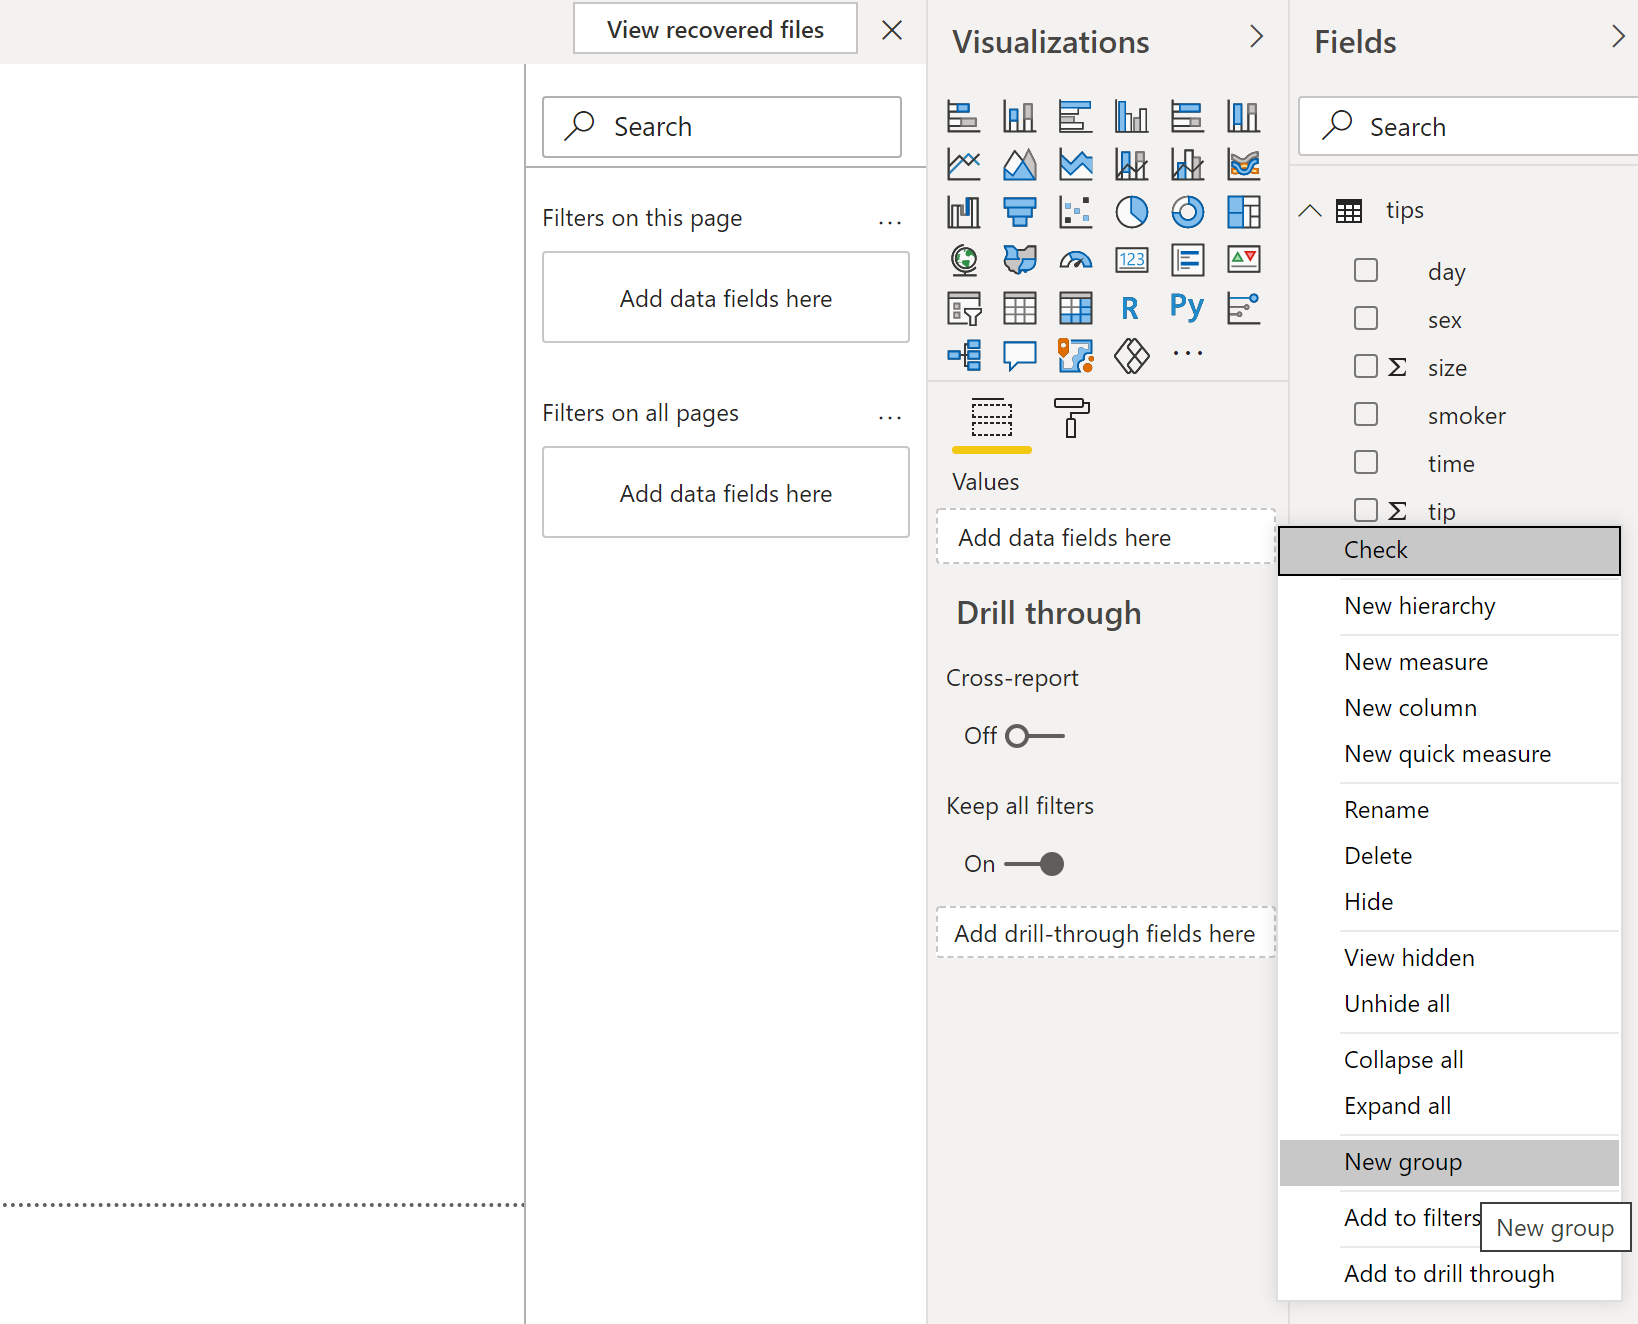

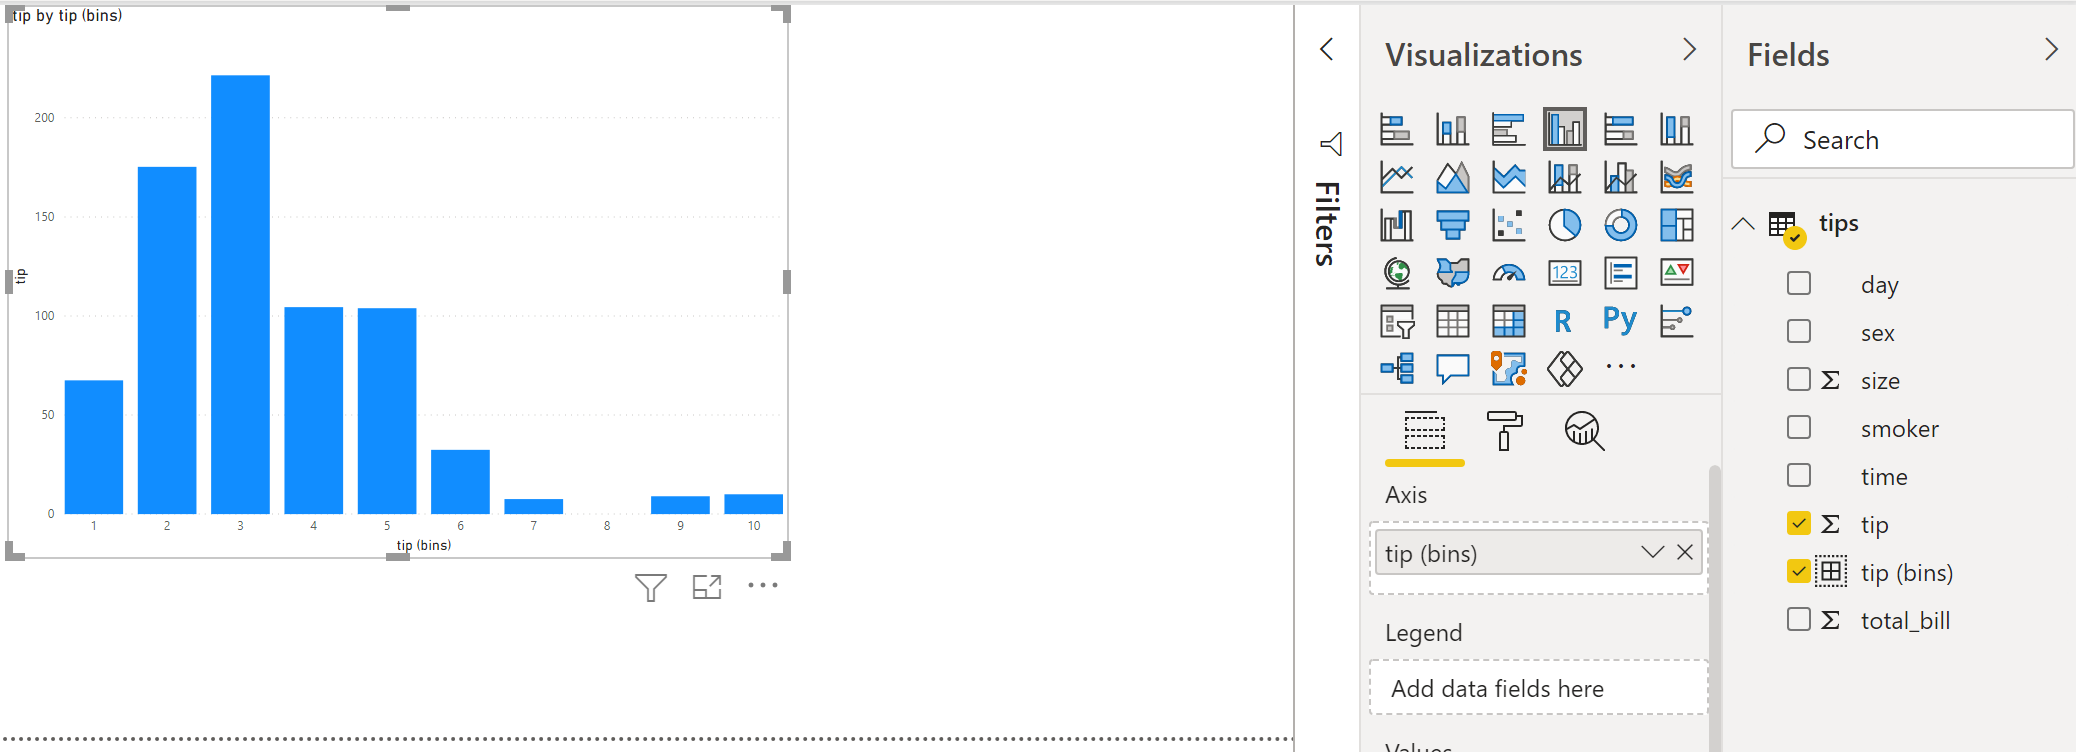

The distribution of values is skewed right and unimodal, as is common in distributions of small, non-negative quantities.

#### Histogram of tip amounts where the bins cover $0.10 increments

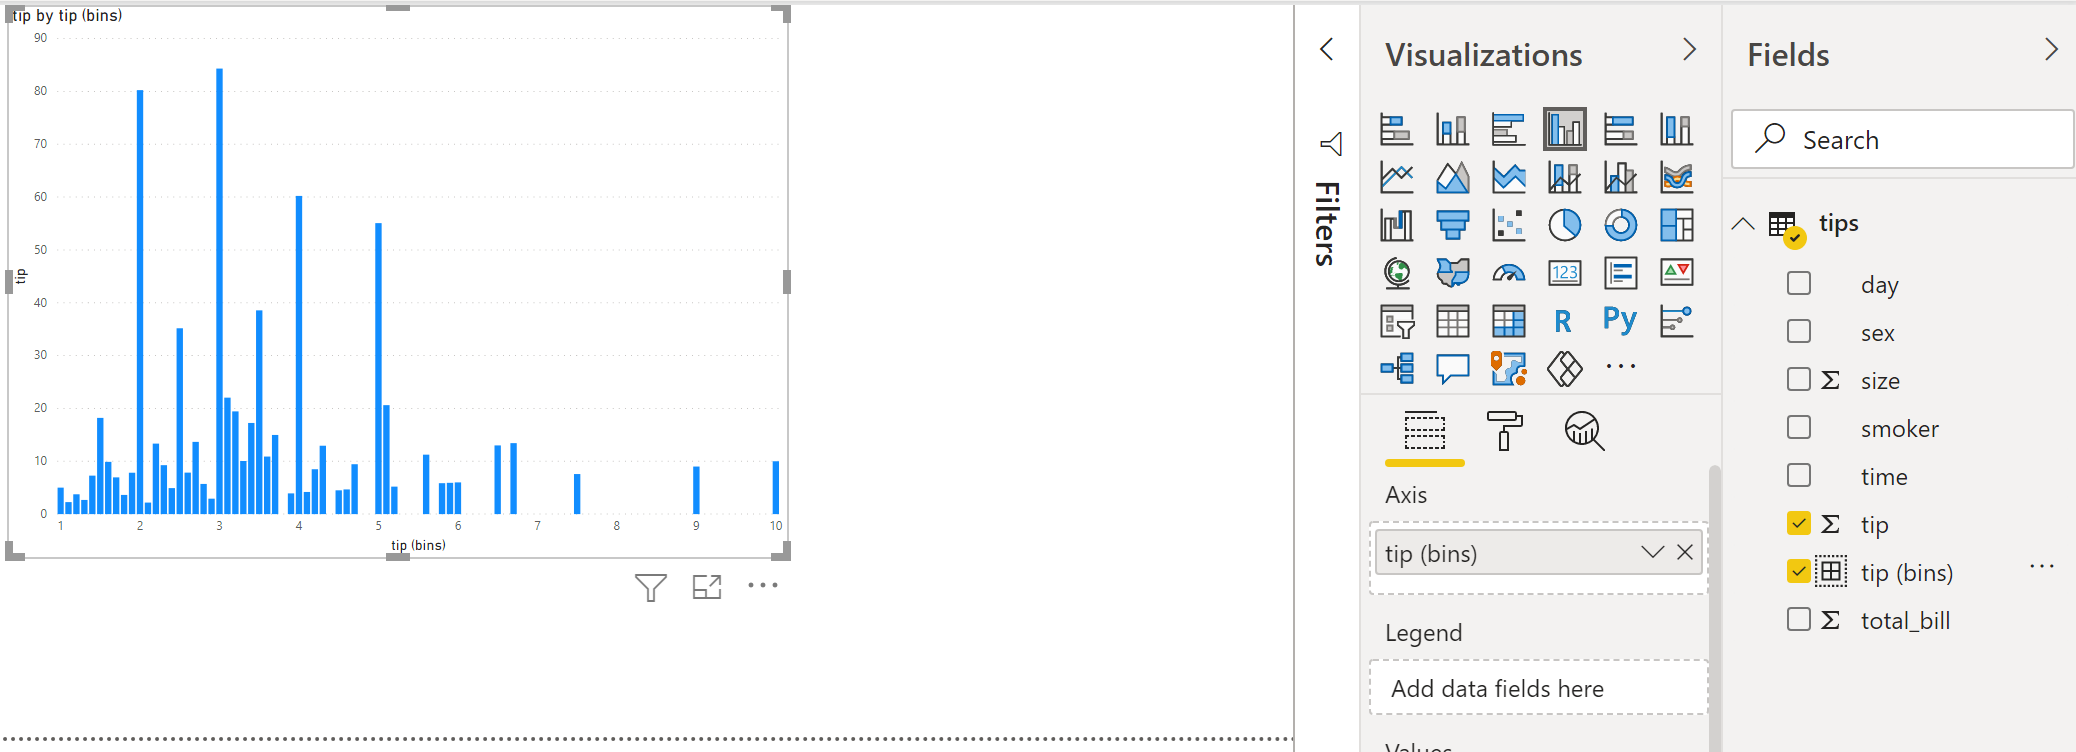

An interesting phenomenon is visible: peaks occur at the whole-dollar and half-dollar amounts, which is caused by customers picking round numbers as tips. This behavior is common to other types of purchases too, like gasoline.

#### Scatterplot of tips vs. bill

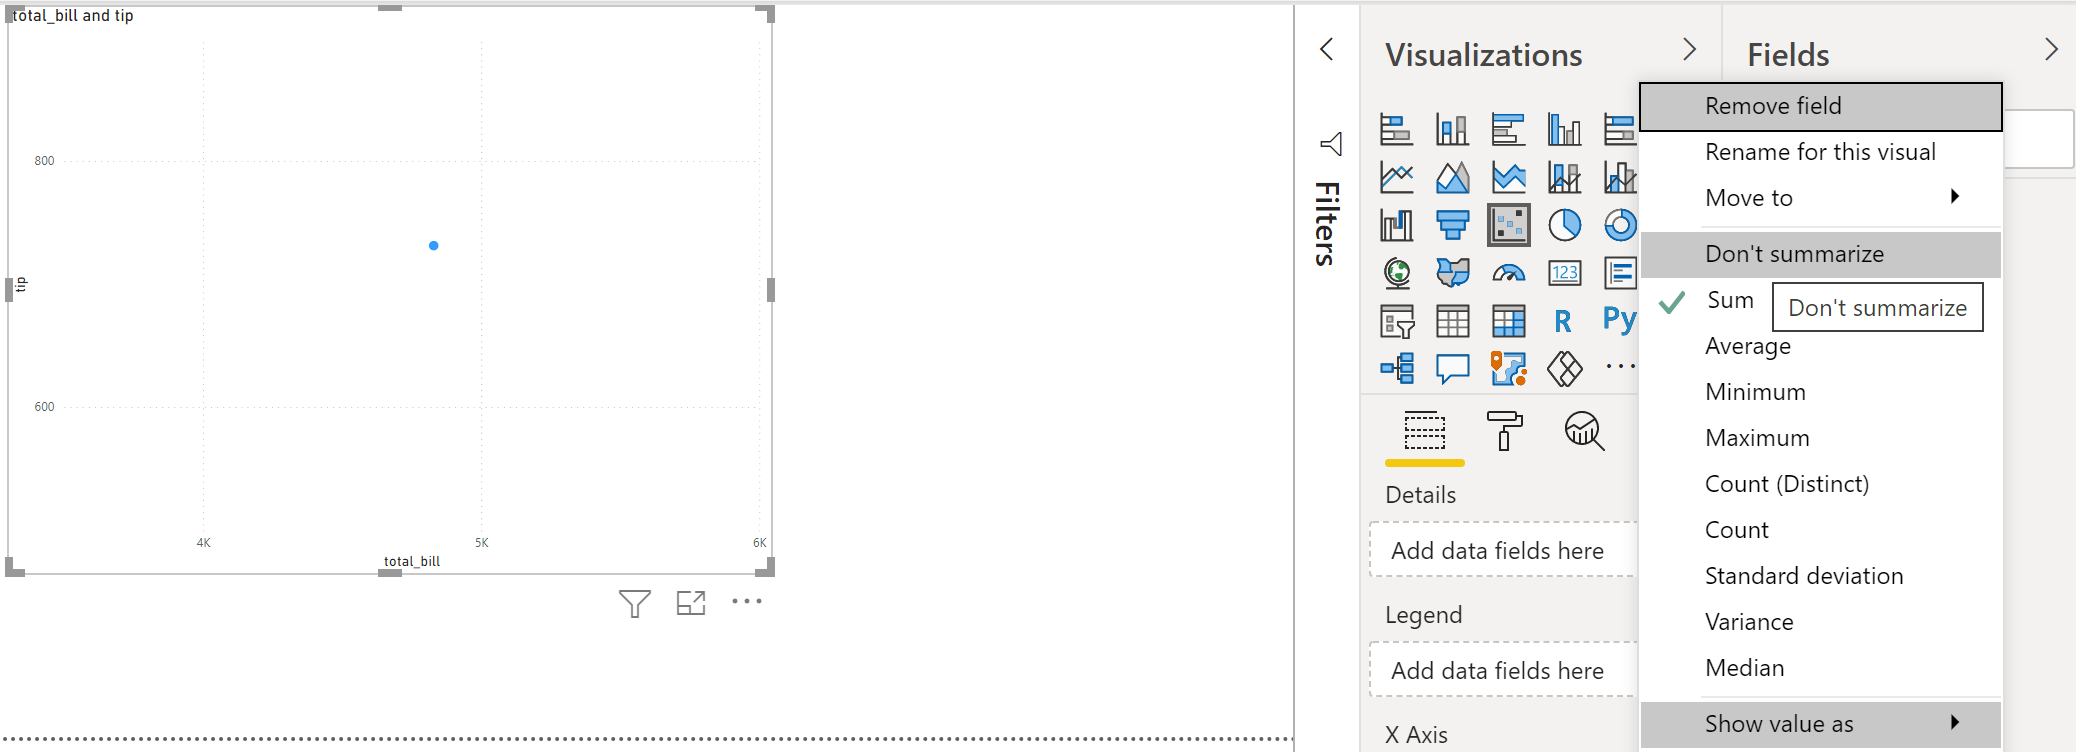

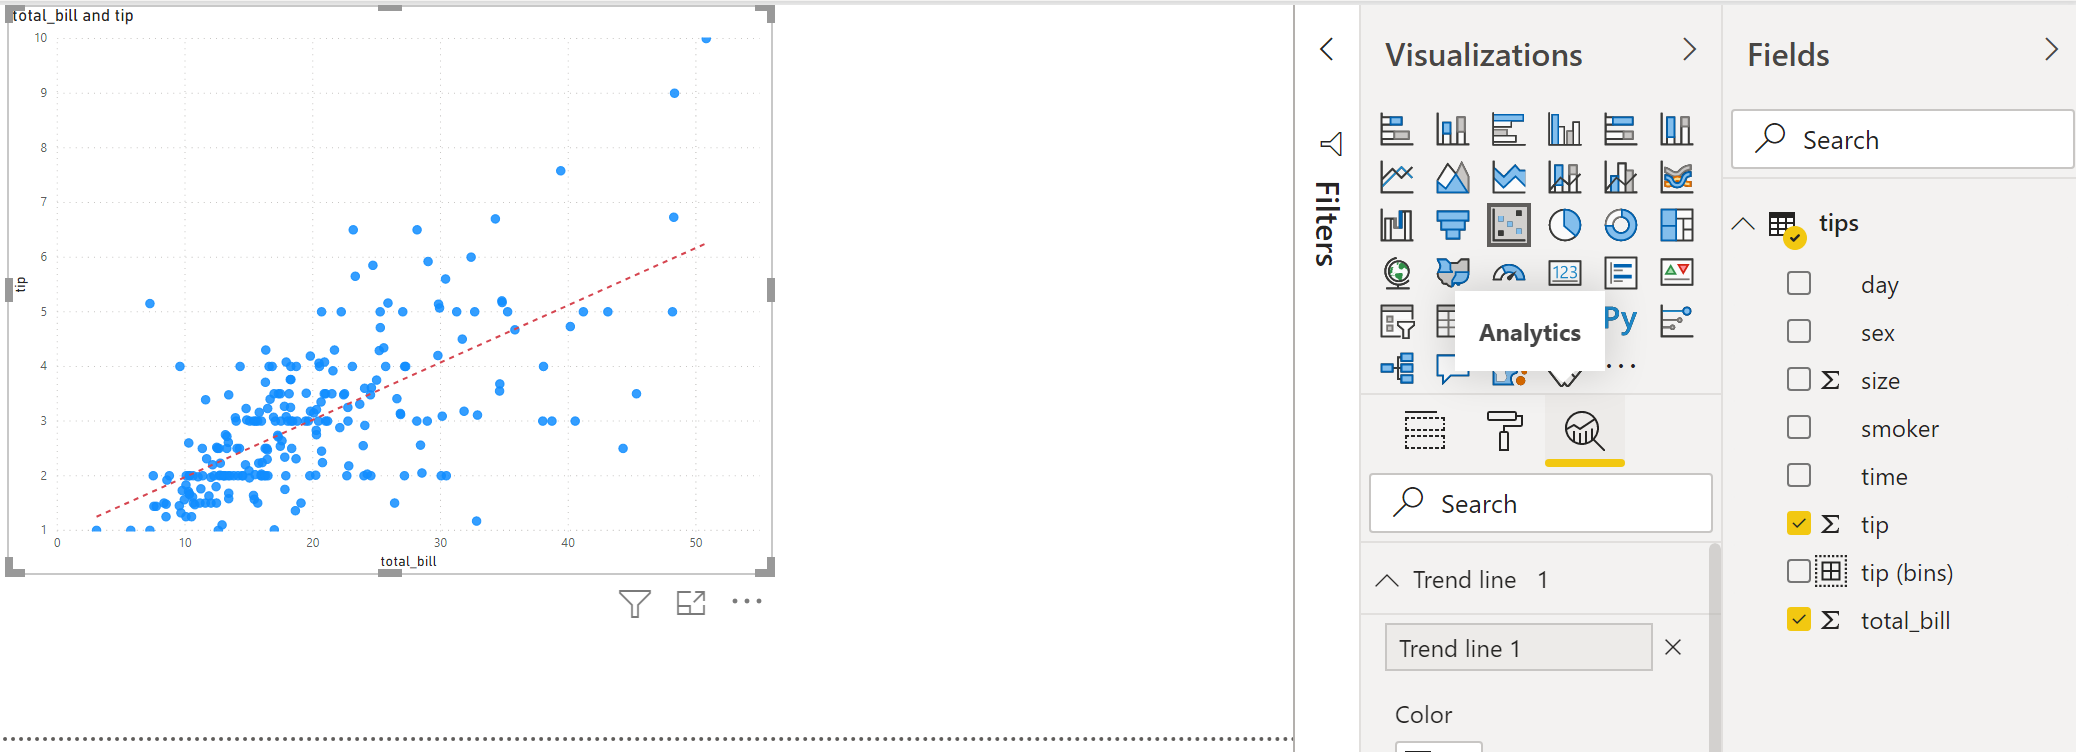

Points below the line correspond to tips that are lower than expected (for that bill amount), and points above the line are higher than expected. We might expect to see a tight, positive linear association, but instead see variation that increases with tip amount. In particular, there are more points far away from the line in the lower right than in the upper left, indicating that more customers are very cheap than very generous.

#### Scatterplot of tips vs. bill separated by payer gender and smoking section status

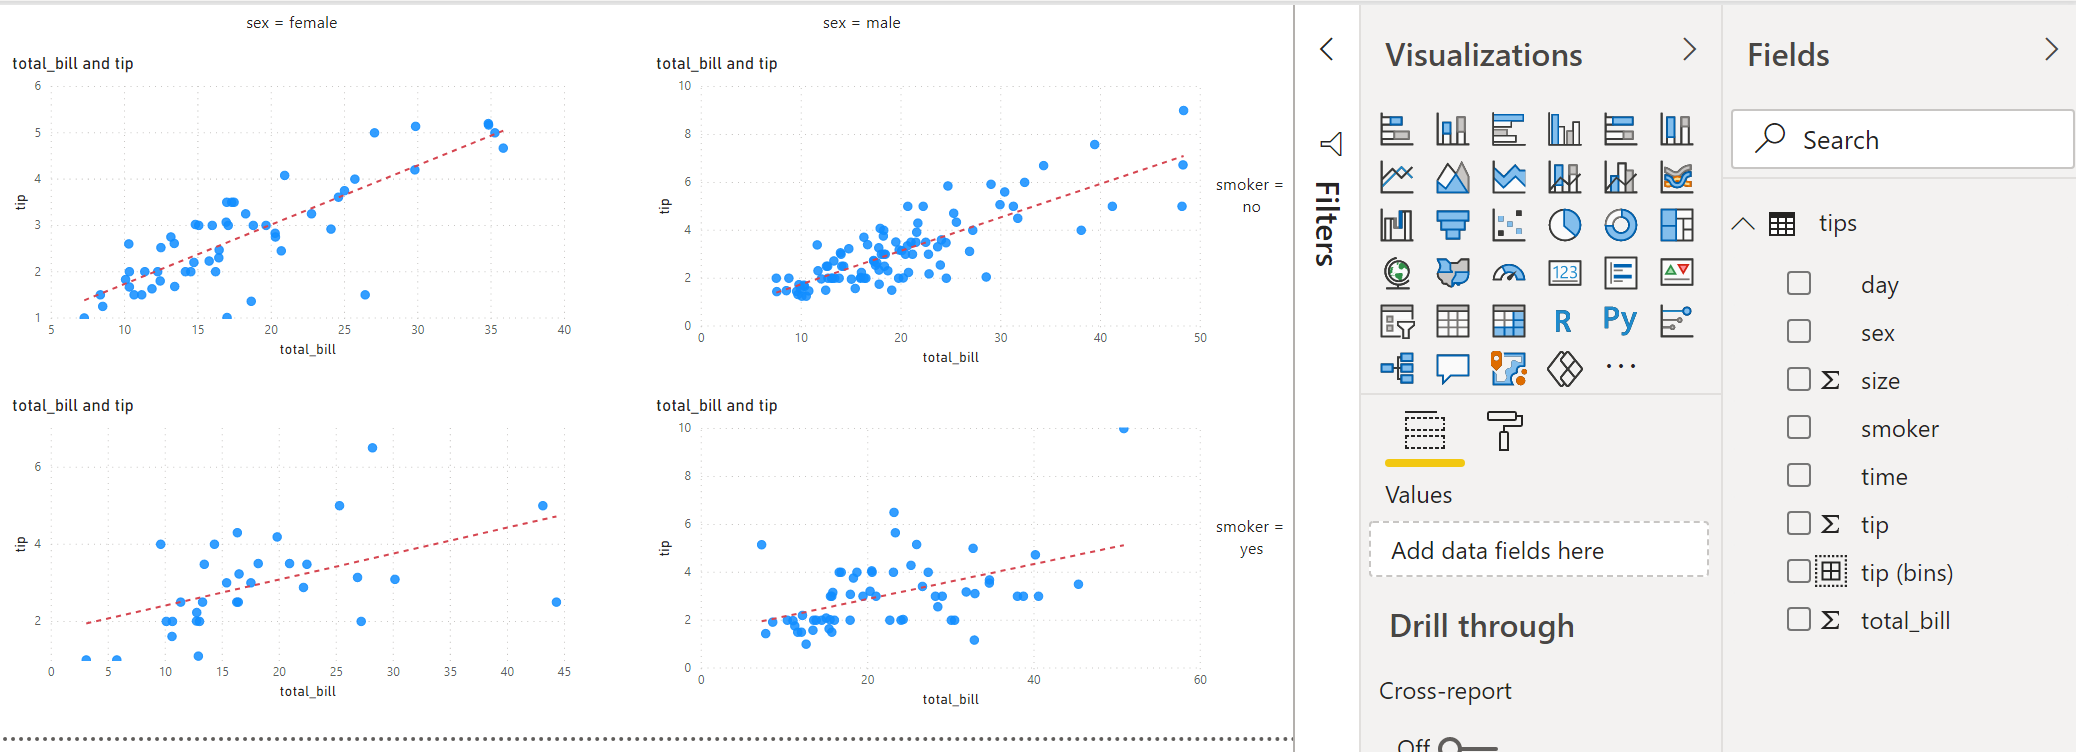

Scatterplot of tips vs. bill separated by payer gender and smoking section status. Smoking parties have a lot more variability in the tips that they give. Males tend to pay the (few) higher bills, and the female non-smokers tend to be very consistent tippers (with three conspicuous exceptions shown in the sample).

### Option 2: EDA in Python

#### Histogram of tip amounts where the bins cover $1.00 increments

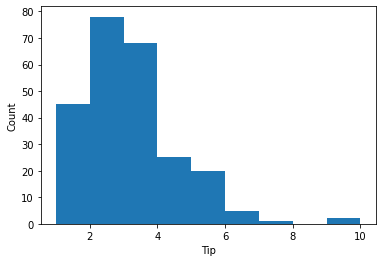

In [ ]:
# Set data fields
y = dfTips.loc[:,'tip']

# Set histogram parameters
binwidth = 1.0
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()

The distribution of values is skewed right and unimodal, as is common in distributions of small, non-negative quantities.

#### Histogram of tip amounts where the bins cover $0.10 increments

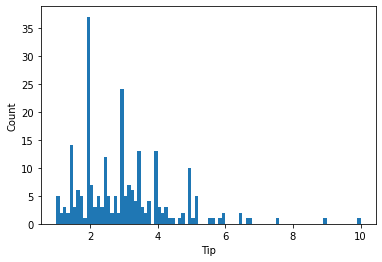

In [ ]:
# Set data fields
y = dfTips.loc[:,'tip']

# Set histogram parameters
binwidth = 0.1
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()

An interesting phenomenon is visible: peaks occur at the whole-dollar and half-dollar amounts, which is caused by customers picking round numbers as tips. This behavior is common to other types of purchases too, like gasoline.

#### Scatterplot of tips vs. bill

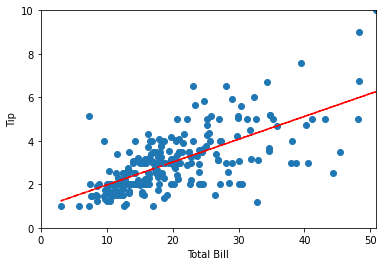

In [ ]:
# Set data fields
x = dfTips.loc[:,'total_bill']
y = dfTips.loc[:,'tip']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfTips.loc[:,'total_bill']))
plt.ylim(0,np.max(dfTips.loc[:,'tip']))
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

Points below the line correspond to tips that are lower than expected (for that bill amount), and points above the line are higher than expected. We might expect to see a tight, positive linear association, but instead see variation that increases with tip amount. In particular, there are more points far away from the line in the lower right than in the upper left, indicating that more customers are very cheap than very generous.

#### Scatterplot of tips vs. bill separated by payer gender and smoking section status

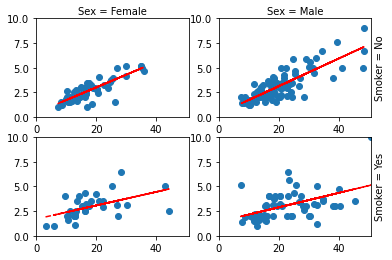

In [ ]:
### Matrix of plots
fig, axs = plt.subplots(2, 2)

## Top left plot
x = dfTips.loc[(dfTips['sex']=='Female') & (dfTips['smoker']=='No'),'total_bill']
y = dfTips.loc[(dfTips['sex']=='Female') & (dfTips['smoker']=='No'),'tip']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 0].scatter(x,y)
axs[0, 0].plot(x,p(x),"r--")
axs[0, 0].set_xlim(0,np.max(dfTips.loc[:,'total_bill']))
axs[0, 0].set_ylim(0,np.max(dfTips.loc[:,'tip']))
axs[0, 0].set_xlabel('Sex = Female')
axs[0, 0].xaxis.set_label_position("top")
#axs[0, 0].set_ylabel('Smoker = No')
#axs[0, 0].yaxis.set_label_position("right")

## Top right plot
x = dfTips.loc[(dfTips['sex']=='Male') & (dfTips['smoker']=='No'),'total_bill']
y = dfTips.loc[(dfTips['sex']=='Male') & (dfTips['smoker']=='No'),'tip']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 1].scatter(x,y)
axs[0, 1].plot(x,p(x),"r--")
axs[0, 1].set_xlim(0,np.max(dfTips.loc[:,'total_bill']))
axs[0, 1].set_ylim(0,np.max(dfTips.loc[:,'tip']))
axs[0, 1].set_xlabel('Sex = Male')
axs[0, 1].xaxis.set_label_position("top")
axs[0, 1].set_ylabel('Smoker = No')
axs[0, 1].yaxis.set_label_position("right")

## Bottom left plot
x = dfTips.loc[(dfTips['sex']=='Female') & (dfTips['smoker']=='Yes'),'total_bill']
y = dfTips.loc[(dfTips['sex']=='Female') & (dfTips['smoker']=='Yes'),'tip']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 0].scatter(x,y)
axs[1, 0].plot(x,p(x),"r--")
axs[1, 0].set_xlim(0,np.max(dfTips.loc[:,'total_bill']))
axs[1, 0].set_ylim(0,np.max(dfTips.loc[:,'tip']))
#axs[1, 0].set_xlabel('Sex = Female')
#axs[1, 0].xaxis.set_label_position("top")
#axs[1, 0].set_ylabel('Smoker = Yes')
#axs[1, 0].yaxis.set_label_position("right")

## Bottom right plot
x = dfTips.loc[(dfTips['sex']=='Male') & (dfTips['smoker']=='Yes'),'total_bill']
y = dfTips.loc[(dfTips['sex']=='Male') & (dfTips['smoker']=='Yes'),'tip']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 1].scatter(x,y)
axs[1, 1].plot(x,p(x),"r--")
axs[1, 1].set_xlim(0,np.max(dfTips.loc[:,'total_bill']))
axs[1, 1].set_ylim(0,np.max(dfTips.loc[:,'tip']))
#axs[1, 1].set_xlabel('Sex = Male')
#axs[1, 1].xaxis.set_label_position("top")
axs[1, 1].set_ylabel('Smoker = Yes')
axs[1, 1].yaxis.set_label_position("right")


Scatterplot of tips vs. bill separated by payer gender and smoking section status. Smoking parties have a lot more variability in the tips that they give. Males tend to pay the (few) higher bills, and the female non-smokers tend to be very consistent tippers (with three conspicuous exceptions shown in the sample).

## Takeaways

What is learned from the plots is different from what is illustrated by the regression model, even though the experiment was not designed to investigate any of these other trends. The patterns found by exploring the data suggest hypotheses about tipping that may not have been anticipated in advance, and which could lead to interesting follow-up experiments where the hypotheses are formally stated and tested by collecting new data.

utexas_ds_orie_divider_gray.png